In [1]:
import os

import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
data_values = np.load("../data/data.npy")
label_data = np.load("../data/label.npy")

In [3]:
scaler = MinMaxScaler()
scaler.fit(data_values)
norm_values = scaler.transform(data_values)
x_train, x_val, y_train, y_val = train_test_split(norm_values, label_data, test_size=0.25)

In [4]:
train_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_val, label=y_val)

In [5]:
param = {
    'learning_rate': 0.1,
    'max_depth': 2,
    'num_threads': 4,
    'objective': 'cross_entropy'
}
bst = lgb.train(param, train_data, 10, valid_sets=[val_data])

[LightGBM] [Info] [cross_entropy:Init]: (objective) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 10347.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 10347, number of used features: 30
[LightGBM] [Info] [cross_entropy:Init]: (metric) labels passed interval [0, 1] check
[LightGBM] [Info] [cross_entropy:Init]: sum-of-weights = 3450.000000
[LightGBM] [Info] [cross_entropy:BoostFromScore]: pavg = 0.825940 -> initscore = 1.557121
[LightGBM] [Info] Start training from score 1.557121


In [6]:
preds = bst.predict(x_val)
preds

array([0.918796, 0.918796, 0.918796, ..., 0.918796, 0.918796, 0.918796])

In [7]:
preds = np.where(preds > 0.5, 1, 00)

In [8]:
print(classification_report(y_val, preds))
print("Accuracy Score: ", accuracy_score(y_val, preds))

              precision    recall  f1-score   support

         0.0       0.95      0.39      0.55       621
         1.0       0.88      1.00      0.93      2829

    accuracy                           0.89      3450
   macro avg       0.91      0.69      0.74      3450
weighted avg       0.89      0.89      0.87      3450

Accuracy Score:  0.8860869565217391


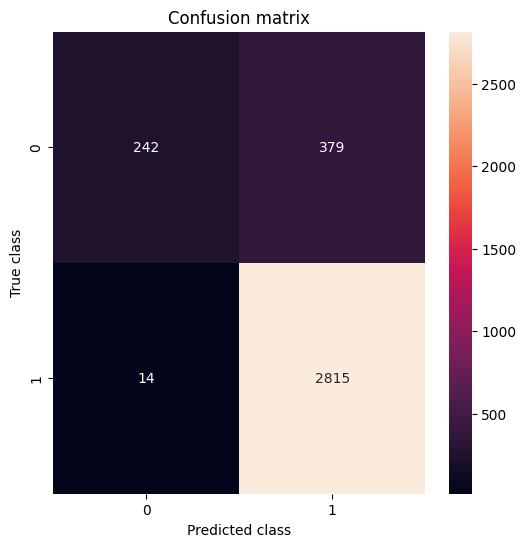

In [9]:
conf_matrix = confusion_matrix(y_val, preds)

plt.figure(figsize =(6, 6)) 
sn.heatmap(conf_matrix, annot=True, fmt="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class')
plt.xlabel('Predicted class') 
plt.show()

In [10]:
os.makedirs("../models/lightgbm", exist_ok=True)
bst.save_model('../models/lightgbm/0001.txt')